# Python in Astronomy : Introduction and FUT data

[**Download this notebook**](https://ifa-edu-it.github.io/learning-material/courses/astronomy/FUT.ipynb)

## 1. Introduction

At Aarhus university we have a number of remote telescopes, one of which is the FUT (Fjernstyrede UndervisningsTeleskop) available for students to use and access data from. It is a 60cm reflector located in eastern Australia, meaning that it is possible, due to the time difference, to collect data from Denmark during the daytime using the web interface at http://fut.phys.au.dk. The telescope is equipped with a monochrome camera and filter wheel such that images in different wavelength-bands can be collected. 

The data obtained from the telescope is stored on the FUT server and can be accessed using the web interface. The data is stored in a FITS format, which is a standard format for storing astronomical data. The data can be downloaded from the server and analysed using Python, which we will demonstrate in this notebook!

To collect data from the telescope, go to the website above and create an account. Once you have an account, you can access the "dataarkiv" in the left menu bar. Here you can see data that has been collected (by anyone!) and download it. Grab some data you like - if you are unsure what to do, you can try searching for "eagle nebula" in the "object navn" tab, and grab an image. You can see a low-resolution preview of the image by clicking on the image icon to the left of the image name.

Now that we have some data, let's get on with using Python to interact with it!



## 2 . Loading the data

To load and interact with the data, we can generally use the `astropy` and `numpy` modules. Let's import numpy and a specific module from `astropy.io` called `fits`:

In [2]:
import numpy as np
from astropy.io import fits

Now lets load the image! I put my .fits file in a folder called `data` in the same directory as this notebook, so I can load it the `fits.open` function and print out some info:

In [16]:
# Read in the data
data = fits.open('data/fut_mtkent_2022-06-02T22-43-30_v1_cal.fits')
print(data.info())

Filename: data/fut_mtkent_2022-06-02T22-43-30_v1_cal.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     113   (4096, 4096)   float32   
None


As we can see, the data contains 1 HDU (Header Data Unit). The header contains information about the data, such as the date and time of observation, the telescope used, the exposure time, etc. The data array contains the actual image data. We can access the header and data array using the `header` and `data` attributes of the `HDUList` object. Lets print the header:

In [22]:
hdr = data[0].header
hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096                                                  
NAXIS2  =                 4096                                                  
EXTNAME = 'PRIMARY '           / name of extension                              
FILEVER = '2.0     '           / File format version                            
BUNIT   = 'electron'           / Physical unit of array values                  
ORIGIN  = 'FUT/Aarhus'         / Institution responsible for creating this file 
DATE    = '2022-06-03T21:17:28.513' / Time file was created                     
ORIGFILE= 'fut_mtkent_2022-06-02T22-43-30_v1_cal.fits' / Original file name     
OBSERVAT= 'Mt. Kent'           / Observatory name                               
TELESCOP= 'FUT     '        

As seen, there's lots of information to be found here! We can also access the data array using the `data` attribute:

In [23]:
# Get the data
image_data = data[0].data

# Get the data type and dimensions 
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(4096, 4096)


As we can see, the image data is just a regular numpy array that we can manipulate with all the functions we already know from `numpy`!

## 3. Plotting the data
Now that we have loaded the data, we can plot it! We can use the `matplotlib` module to do this. Let's import it:

In [24]:
import matplotlib.pyplot as plt

Now lets actually plot the data. By default, the image will look quite boring and shown below. This is because the high dynamical range in the image is being distributed evenly across the colour map. We can fix this by using the `imshow` function from `matplotlib.pyplot` and specifying the `vmin` and `vmax` arguments. These arguments specify the minimum and maximum values of the colour map, and we can use the `np.percentile` function to find the 1st and 99th percentile of the data array.

In short, this cuts away the very bright and very dark parts of the image, and we can see the nebula much better:

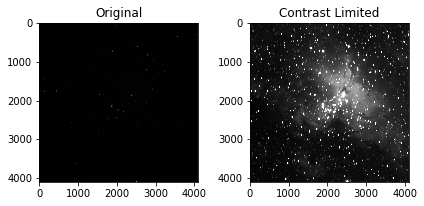

In [60]:
# Get lower 1% and upper 99% boundaries
clim = (np.percentile(image_data, 1), np.percentile(image_data, 99))

# Plot!
fig,ax = plt.subplots(1,2,tight_layout=True)
ax[0].set_title('Original')
ax[0].imshow(image_data, cmap='gray')

ax[1].set_title('Contrast Limited')
ax[1].imshow(image_data, cmap='gray', vmin=clim[0], vmax=clim[1])

## 4. Perspectives

Now that we can load and plot data, and have seen that the data can be manipulated by generic numpy functions, the possibilities are essentially endless! This is because we now can use our knowledge of Python to do whatever we want with the data.

The `AstropyPy` module used to load these data also contains a large number of other functions relevant in astronomical data reduction. It can be an interesting journey to look through some of the examples and documentation found on their website at https://docs.astropy.org/en/stable/ to see what else can be done. 